In [1]:
%%time
import ray
ray.shutdown()
ray.init()
import modin.pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2024-02-09 13:21:09,779	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-09 13:21:11,791	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


CPU times: user 1.67 s, sys: 1.02 s, total: 2.69 s
Wall time: 3.8 s


In [2]:
%%time
df = pd.DataFrame(sns.load_dataset('titanic'))

CPU times: user 195 ms, sys: 19.7 ms, total: 215 ms
Wall time: 209 ms


In [3]:
%%time
df.head()

CPU times: user 638 µs, sys: 310 µs, total: 948 µs
Wall time: 926 µs


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
%%time
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 81.1+ KB
CPU times: user 82.4 ms, sys: 13.2 ms, total: 95.5 ms
Wall time: 831 ms


In [5]:
%%time
df.describe()

CPU times: user 29.5 ms, sys: 6.81 ms, total: 36.4 ms
Wall time: 26.2 ms


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
%%time
df.isna().sum()*100/len(df)

CPU times: user 38.2 ms, sys: 4.94 ms, total: 43.1 ms
Wall time: 22.3 ms


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

CPU times: user 412 ms, sys: 443 ms, total: 855 ms
Wall time: 150 ms


<Axes: ylabel='Count'>

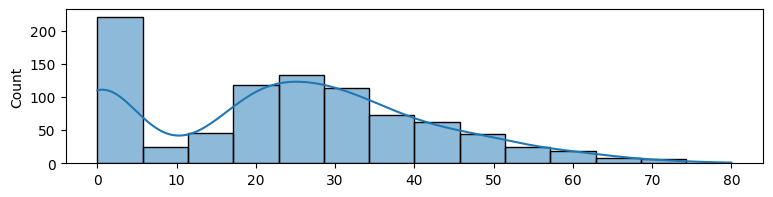

In [7]:
%%time
plt.figure(figsize=(9,2))
sns.histplot(list(df['age'].fillna(0)) , kde=True)

CPU times: user 60.3 ms, sys: 15.8 ms, total: 76.1 ms
Wall time: 52.1 ms


(array([688.,  59.,  32.,   0.,   4.,  33.,   0.,  15.,  47.,  13.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

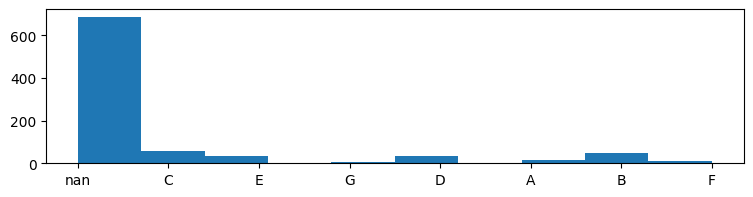

In [8]:
%%time
df['deck'] = pd.Series(df['deck'].astype('str'))
plt.figure(figsize=(9,2))
plt.hist((df.deck))

CPU times: user 62.1 ms, sys: 19.2 ms, total: 81.3 ms
Wall time: 44.8 ms


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

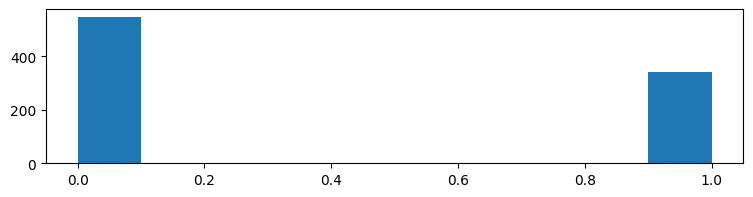

In [9]:
%%time
plt.figure(figsize=(9,2))
plt.hist((df['survived']))

#Matplotlib is faster than seaborn

CPU times: user 60 ms, sys: 6.02 ms, total: 66.1 ms
Wall time: 46.5 ms


(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

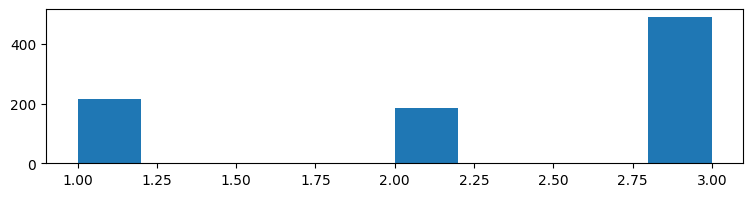

In [10]:
%%time
plt.figure(figsize=(9,2))
plt.hist((df['pclass']))

CPU times: user 66.2 ms, sys: 944 µs, total: 67.1 ms
Wall time: 45 ms


(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

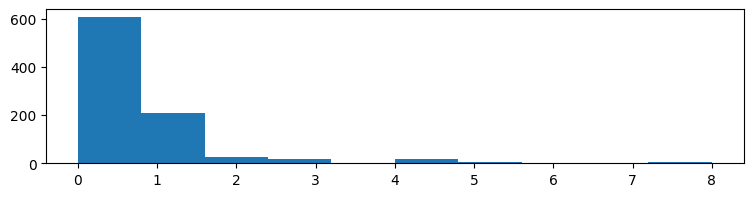

In [11]:
%%time
plt.figure(figsize=(9,2))
plt.hist((df['sibsp']))

CPU times: user 61.8 ms, sys: 0 ns, total: 61.8 ms
Wall time: 44.4 ms


(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

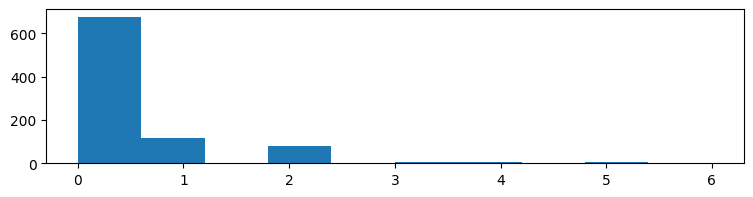

In [12]:
%%time
plt.figure(figsize=(9,2))
plt.hist((df['parch']))

CPU times: user 541 ms, sys: 423 ms, total: 964 ms
Wall time: 174 ms


<Axes: ylabel='Count'>

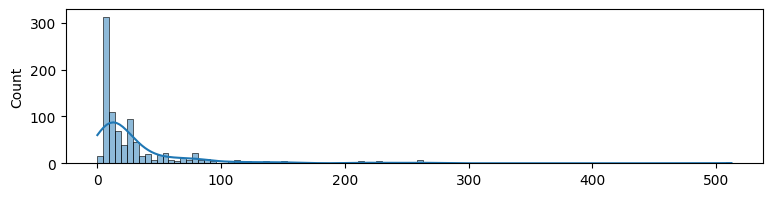

In [13]:
%%time
plt.figure(figsize=(9,2))
sns.histplot(list(df['fare']) , kde=True)

CPU times: user 91 ms, sys: 1.49 ms, total: 92.5 ms
Wall time: 77.8 ms


(array([537.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 354.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

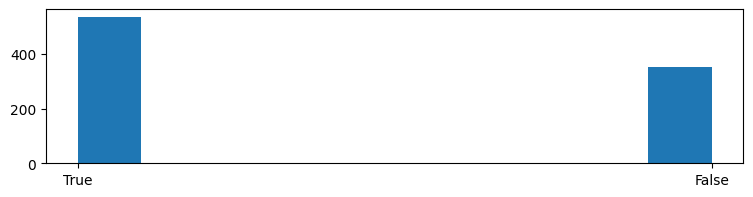

In [14]:
%%time
plt.figure(figsize=(9,2))
plt.hist(df['adult_male'].astype('str'))

CPU times: user 66.2 ms, sys: 7.11 ms, total: 73.3 ms
Wall time: 51.7 ms


(array([491.,   0.,   0.,   0.,   0., 216.,   0.,   0.,   0., 184.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

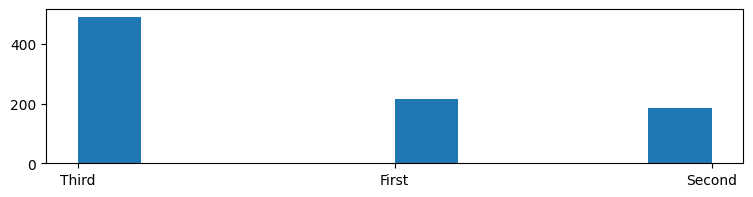

In [15]:
%%time
plt.figure(figsize=(9,2))
plt.hist(df['class'])

CPU times: user 59.3 ms, sys: 3.71 ms, total: 63 ms
Wall time: 47.3 ms


(array([537.,   0.,   0.,   0.,   0., 271.,   0.,   0.,   0.,  83.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

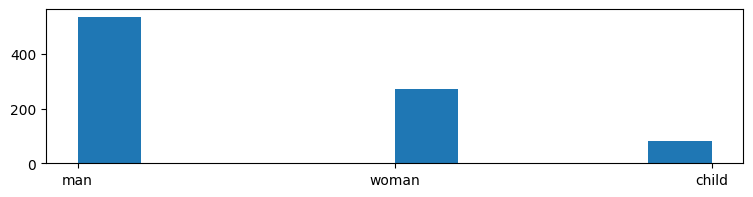

In [16]:
%%time
plt.figure(figsize=(9,2))
plt.hist(df['who'])

CPU times: user 138 ms, sys: 9.2 ms, total: 147 ms
Wall time: 121 ms


(array([644.,   0.,   0., 168.,   0.,   0.,  77.,   0.,   0.,   2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

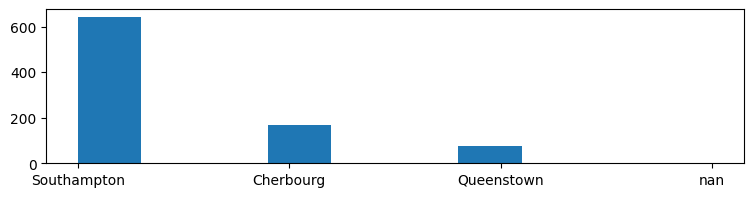

In [17]:
%%time
plt.figure(figsize=(9,2))
plt.hist(df['embark_town'].astype('str'))

CPU times: user 72.9 ms, sys: 26.4 ms, total: 99.3 ms
Wall time: 48.3 ms


(array([354.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 537.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

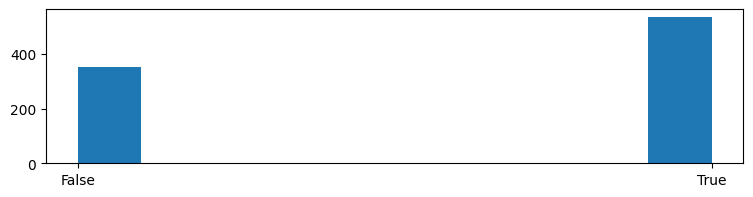

In [18]:
%%time
plt.figure(figsize=(9,2))
plt.hist(df['alone'].astype('str'))

CPU times: user 98 ms, sys: 25.6 ms, total: 124 ms
Wall time: 53.3 ms


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

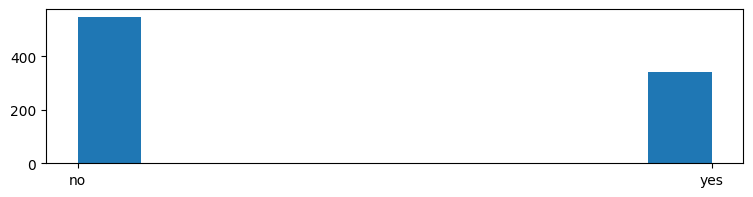

In [19]:
%%time
plt.figure(figsize=(9,2))
plt.hist(df['alive'].astype('str'))

There are a few imbalance columns in data.

alone column and survived column are same.

class column and pclass column are same.

sex column and who column are same.

In [20]:
%%time
pd.crosstab(df.alone , df.alive ,rownames=['alone'], colnames=['survived'])

CPU times: user 88.7 ms, sys: 9.98 ms, total: 98.7 ms
Wall time: 70 ms


Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


survived,no,yes
alone,,
False,175,179
True,374,163


From the above confusion matrix it is clear that If some one was not alone has more chances of being alive

In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [22]:
%%time
pd.crosstab(df.pclass , df.alive ,rownames=['pclass'], colnames=['survived'])

CPU times: user 90.9 ms, sys: 17.4 ms, total: 108 ms
Wall time: 75.3 ms


survived,no,yes
pclass,,
1,80,136
2,97,87
3,372,119


If the person belongs to 3rd passenger class then there is a high probabilty of not surviving where as if he belongs to 1st class then he has high chances of being alive.

In [23]:
%%time
pd.crosstab(df.sex , df.alive ,rownames=['gender'], colnames=['survived'])

CPU times: user 101 ms, sys: 13.4 ms, total: 114 ms
Wall time: 82.1 ms


survived,no,yes
gender,,
female,81,233
male,468,109


The data suggest that if the person is male then he has lower chances of being alive where as female have higher chances of being alive. 

In [24]:
%%time
pd.crosstab(df.sibsp , df.alive ,rownames=['Siblings/Spouses Aboard '], colnames=['survived'])

CPU times: user 125 ms, sys: 8.87 ms, total: 134 ms
Wall time: 73 ms


survived,no,yes
Siblings/Spouses Aboard,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


The data suggest that if a person has no Siblings/Spouses Aboard then there is less chance of being alive whereas if the person have exactly one Siblings/Spouses Aboard then he has high chances of surviving but the survival rate decrease as the number of Siblings/Spouses Aboard increases.

In [25]:
%%time
pd.crosstab(df.parch , df.alive ,rownames=['Parents/Children Aboard'], colnames=['survived'])

CPU times: user 97.2 ms, sys: 9.18 ms, total: 106 ms
Wall time: 67.7 ms


survived,no,yes
Parents/Children Aboard,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


The data suggest that if a person has no Parents/Children Aboard then there is less chance of being alive whereas if the person have exactly one Parents/Children Aboard then he has high chances of surviving but the survival rate decrease as the number of Parents/Children Aboard increases.

In [26]:
%%time
pd.crosstab(df.embarked , df.alive ,rownames=['embarked'], colnames=['survived'])

CPU times: user 94.3 ms, sys: 10.9 ms, total: 105 ms
Wall time: 69.6 ms


survived,no,yes
embarked,,
C,75,93
Q,47,30
S,427,217


In [27]:
type(pd.crosstab(df.embarked , df.alive ,rownames=['embarked'], colnames=['survived']))

modin.pandas.dataframe.DataFrame